# Tropical algebra analysis of the Tyson Cycle

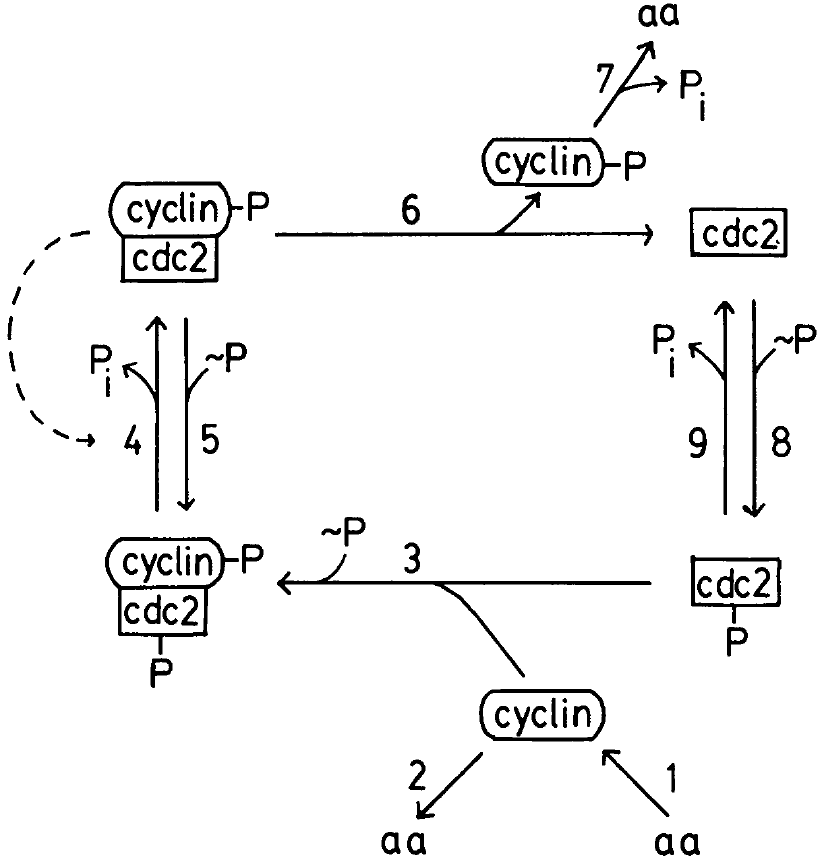

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/oscar/PycharmProjects/pysb')
sys.path.insert(0, '/home/oscar/PycharmProjects/earm')
sys.path.insert(0, '/home/oscar/PycharmProjects/tropical')
sys.path.insert(0, '/home/carlos/Documents/tropical_project/local_simulations/ParticleSwarmOptimization')

from tropicalize import run_tropical
from pysb.examples.tyson_oscillator import model as tyson_model
from earm.lopez_embedded import model as earm_model
from IPython.display import Image, display, Math, Latex
import numpy as np
import pylab
import matplotlib.cm as cm
import csv
from PIL import Image as Im
from os.path import isfile, join
from os import listdir
Image(filename='TysonGraph.png', width=600)

This is the yeast cell cycle modeled by John Tyson in 1991 http://www.pnas.org/content/88/16/7328.full.pdf. In this model Tyson made a mathematical model for the interactions of cdc2 and cyclin, two proteins that form a heterodimer (maturation promoting factor) that controls the major events of the cell cycle.

System of Ordinary Differential Equations (ODE) that describe the Tyson Cycle (1991)

$$\frac{ds_0}{dt} = -s_0s_1k_3 - s_0k_9 + s_4k_8$$
$$\frac{ds_1}{dt} = -s_0s_1k_3 + s_2k_1$$
$$\frac{ds_2}{dt} = 0$$
$$\frac{ds_3}{dt} = s_0s_1k_3 - 0.5*s_3s_5^2k_4 - s_3k_4^\prime$$
$$\frac{ds_4}{dt} = s_0k_9 - s_4k_8+ s_5k_6$$
$$\frac{ds_5}{dt} = 0.5*s_3s_5^2k_4 + s_3k_4^\prime - s_5k_6$$

We set the ODEs equal to zero find the passenger and driver species doing a quasi steady steady approximation, using the imposed traces.

$$0 = -s_0^\star s_1k_3 - s_0^\star k_9 + s_4k_8$$
$$0 = -s_0s_1^\star k_3 + s_2k_1$$
$$0 = 0$$
$$0 = s_0s_1k_3 - 0.5*s_3^\star s_5^2k_4 - s_3^\star k_4^\prime$$
$$0 = s_0k_9 - s_4^\star k_8+ s_5k_6$$
$$0 = 0.5*s_3s_5^{\star 2} k_4 + s_3k_4^\prime - s_5^\star k_6$$

Solving for the imposed trace we get:

$$ s_0^\star = \frac{s_4k_8}{s_1k_3+k_9}$$
$$ s_1^\star = \frac{s_2k_1}{s_0k_3}$$
$$ s_3^\star = \frac{2*s_0s_1*k_3}{s_5^2k_4+2*k_4^\prime}$$
$$ s_4^\star = \frac{s_0k_9+s_5k_6}{k_8}$$
$$ s_5^\star = \frac{k_6 +- \sqrt{-2*s_3^2k_4k_4^\prime +k_6^2}}{s_3k_4}$$


<function matplotlib.pyplot.show>

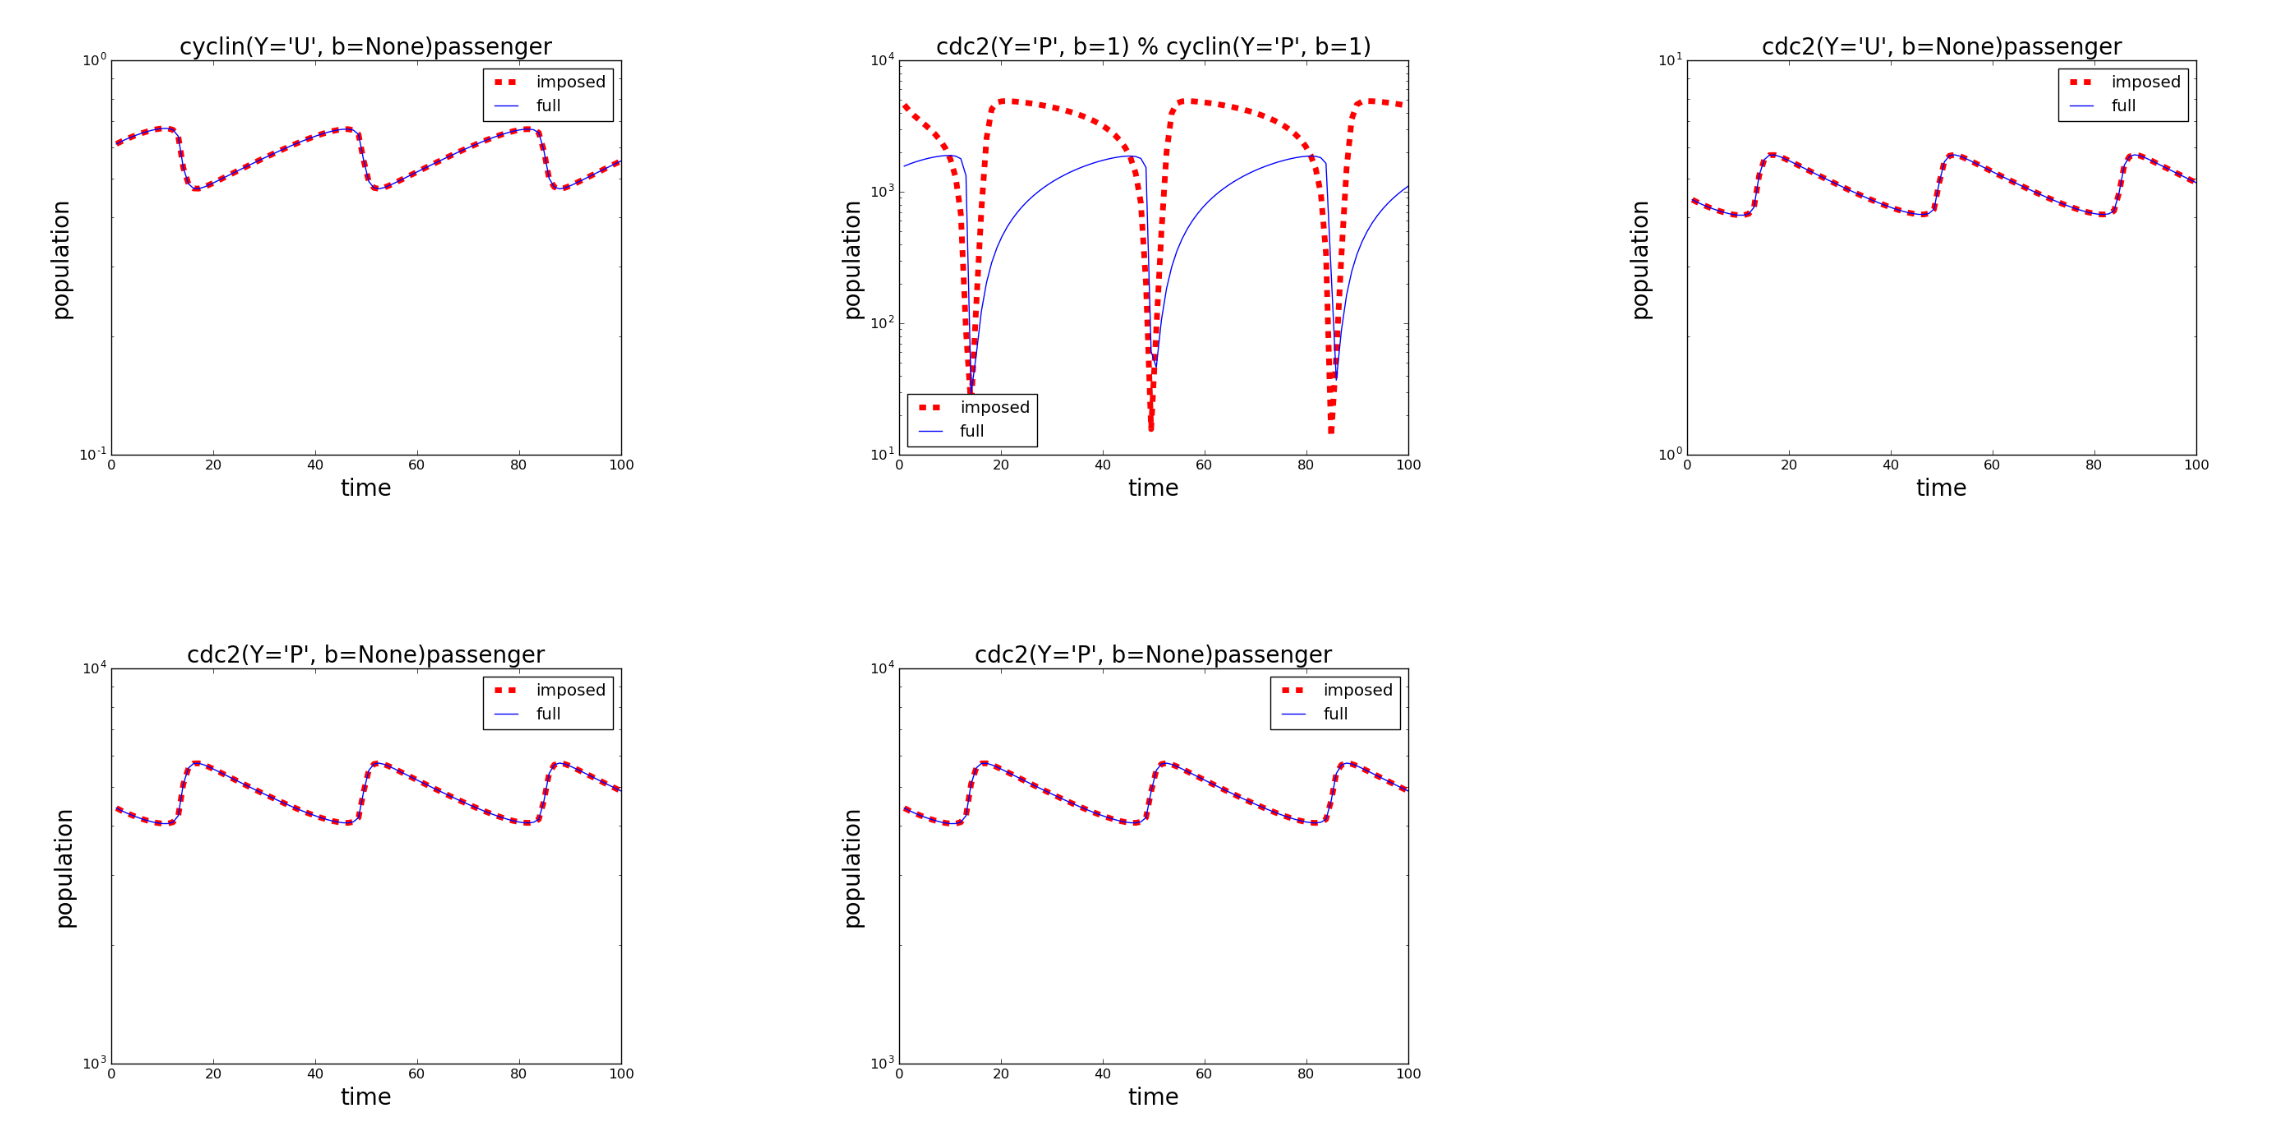

In [2]:
path_to_files = 'tyson_passengers'
passengers_fig = [join(path_to_files,f) for f in listdir(path_to_files) if isfile(join(path_to_files,f))]
f = pylab.figure(figsize=(40,20))
for n, fname in enumerate(passengers_fig):
    image = Im.open(fname)
    arr=np.asarray(image)
    f.add_subplot(2,3,n+1)
    pylab.imshow(arr, interpolation=None)
    plt.axis('off')
pylab.show

From the images, we can see that the species cdc2(Y='U', b=1)%cyclin(Y='P', b=1) and cdc(Y='P', b=1)%cyclin(Y='P', b=1) are the species driving the dynamics of the system, now we prune the system of hte passenger equations and find the conservation laws define by the network, in order to describe those equations in terms of the driver species

$$0 = -s_0 s_1k_3 - s_0 k_9 + s_4k_8$$
$$0 = -s_0s_1 k_3 + s_2k_1$$
$$0 = s_0k_9 - s_4 k_8+ s_5k_6$$
$$C_1 = s_0+s_3+s_4+s_5$$
$$C_2 = s_2$$

<function matplotlib.pyplot.show>

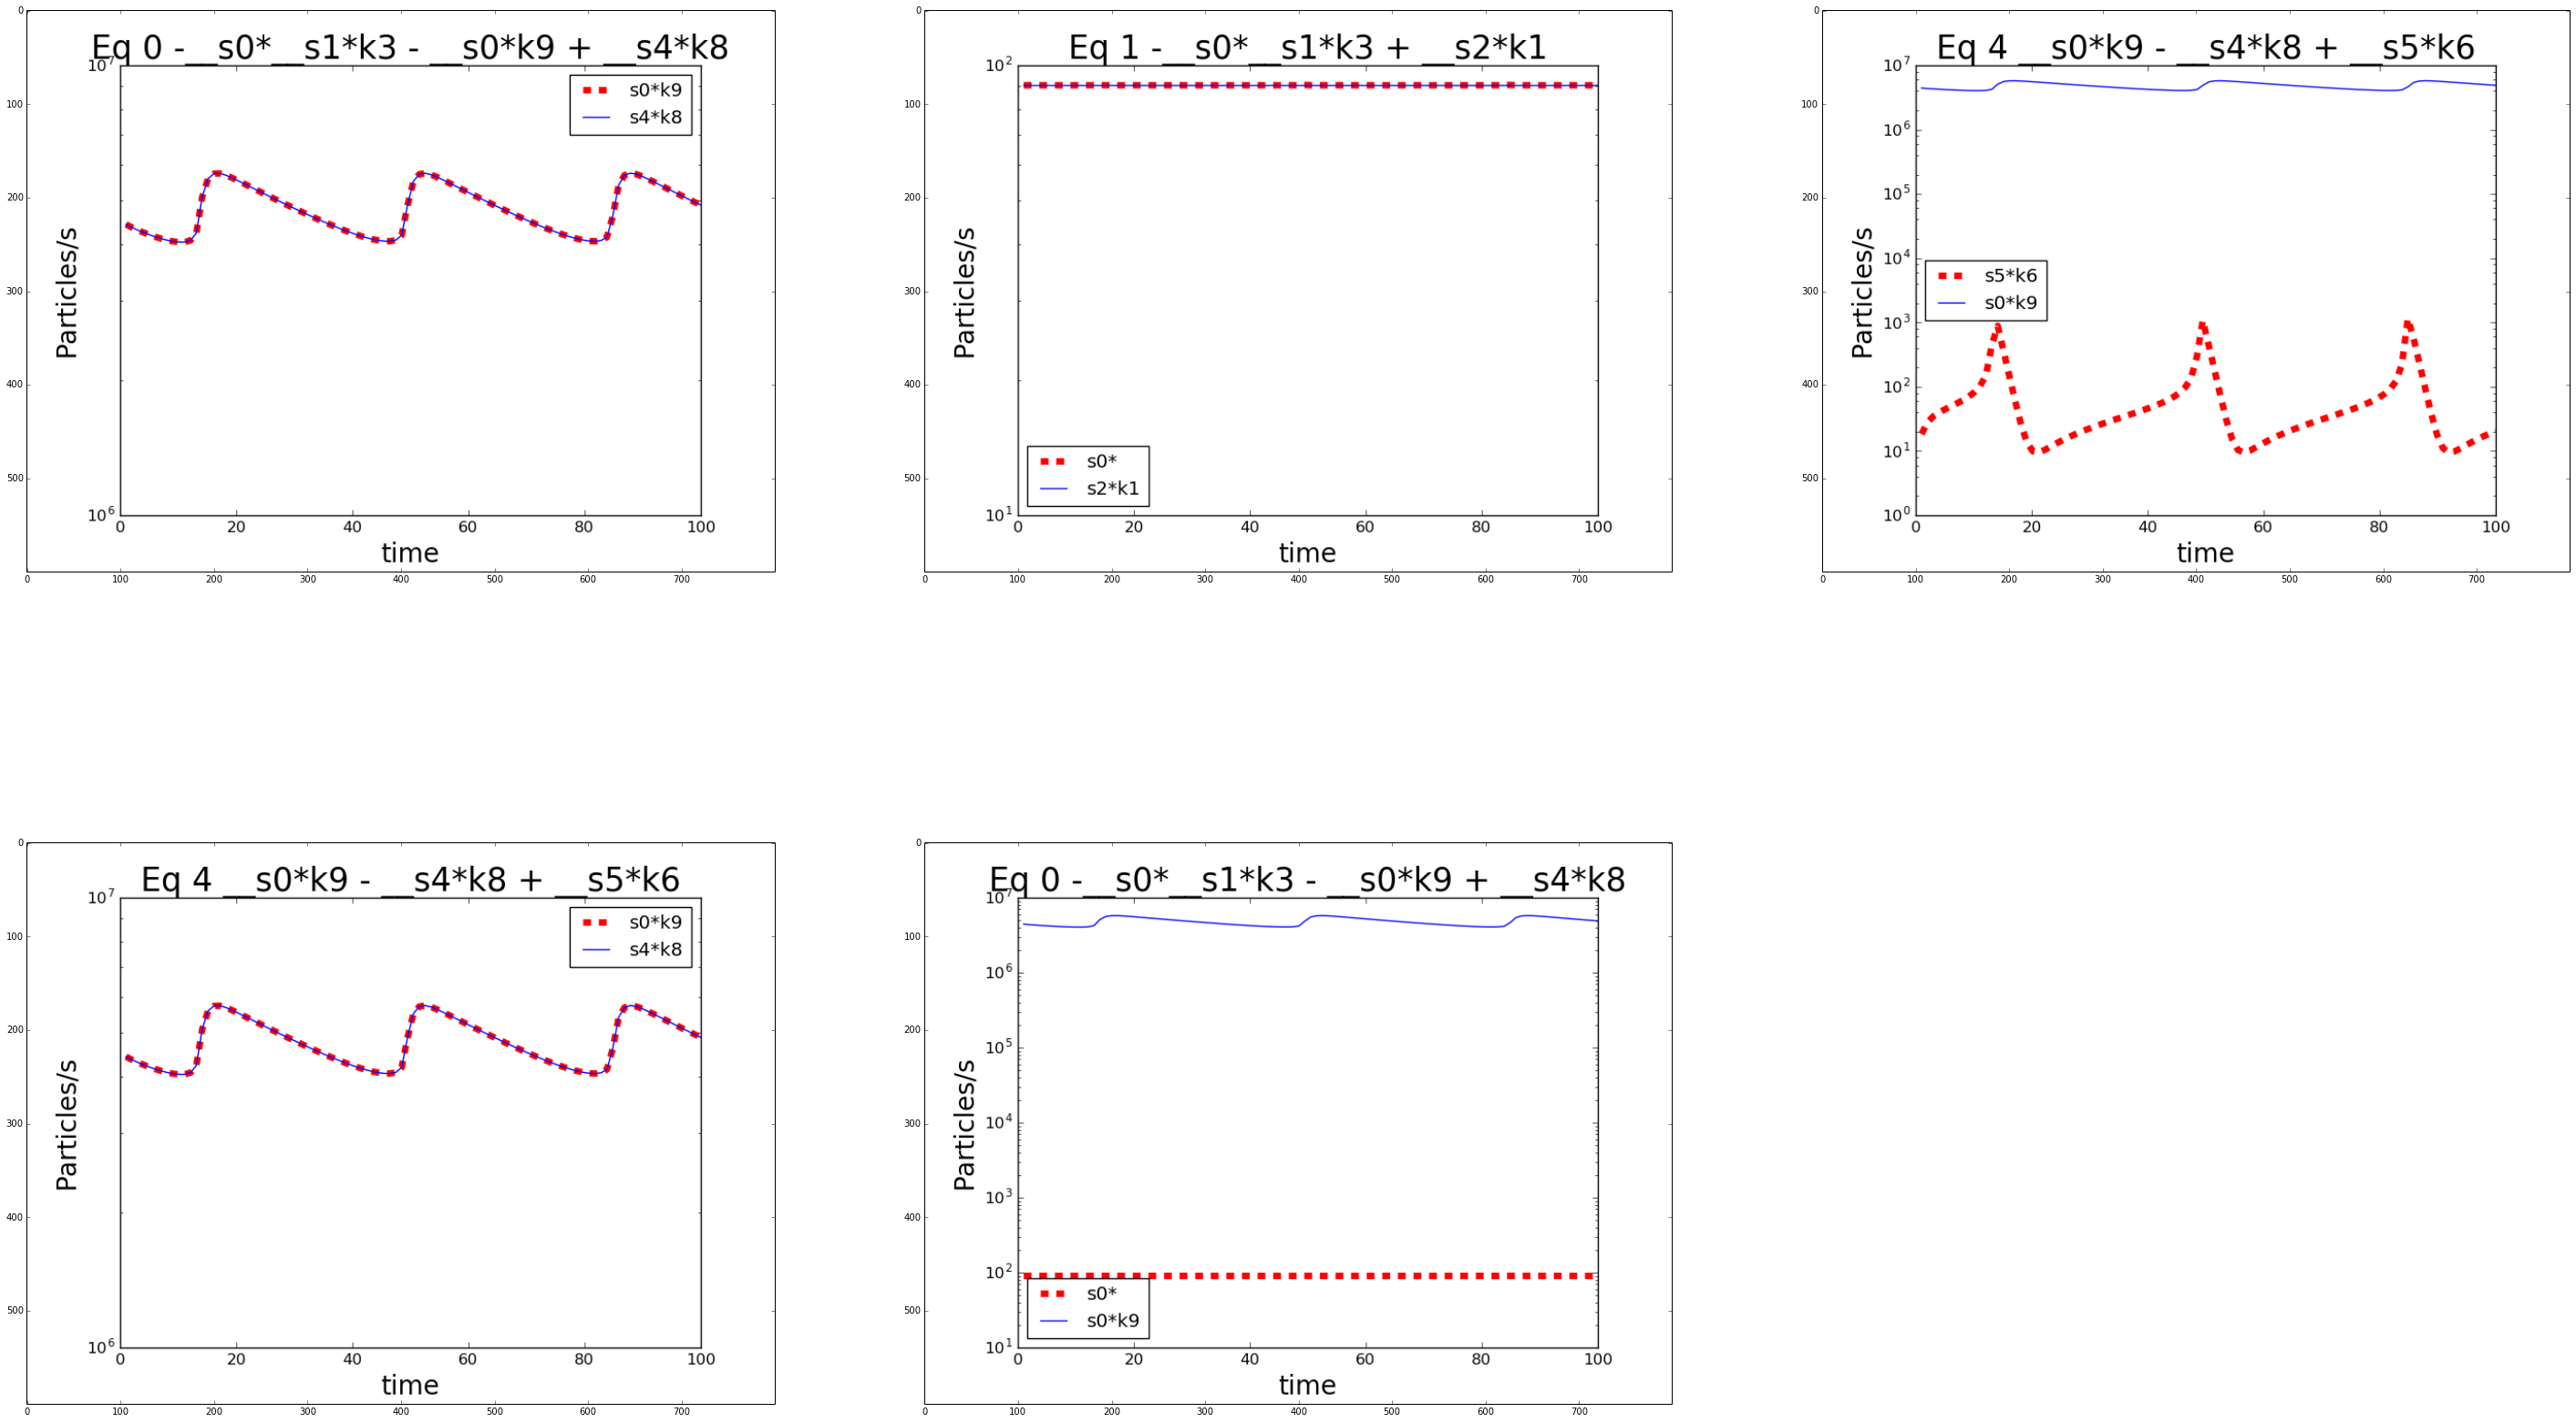

In [3]:
path_to_files = 'tyson_pruning'
passengers_fig = [join(path_to_files,f) for f in listdir(path_to_files) if isfile(join(path_to_files,f))]
f = pylab.figure(figsize=(50,30))
for n, fname in enumerate(passengers_fig):
    image = Im.open(fname)
    arr=np.asarray(image)
    f.add_subplot(2,3,n+1)
    pylab.imshow(arr, interpolation=None)
pylab.show

As a result of the pruning, we get the following pruned system of equations:
$$0 =  - s_0 k_9 + s_4k_8$$
$$0 = -s_0s_1 k_3 + s_2k_1$$
$$0 = s_0k_9 - s_4 k_8$$


Using this system of algebraic equations is possible to write $y_1$, $y_2$ and $y_5$ in terms of $y_3$ and $y_4$ and we get the following reduced differential-algebraic dynamical system:
$$y_3^\prime = Dom[k_4^\prime + k_4y_4y_3^2/C^2 - k_6y_3]$$
$$y_4^\prime = Dom[-k_4^\prime - k_4y_4y_3^2/C^2 +k_1]$$
$$y_1 = (C-y_3-y_4)k_9/(k_8+k_9)$$
$$y_2 = (C-y_3-y_4)k_8/(k_8+k_9)$$
$$y_5 = k_1(k_8+k9)/(k_3k_8(C-y_3-y_4))$$

Solving Simulation
creating /tmp/scipy-oscar-962leN/python27_intermediate/compiler_8855277b295f576c423c618665ded9a0
Getting Passenger species
solution 0 from equation 5 is complex
solution 1 from equation 5 is complex
Computing conservation relations
Computing Conservation laws
Pruning Equations
equation to tropicalize
Getting tropicalized equations
there are no monomials
there are no monomials


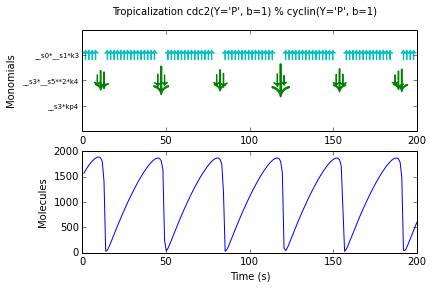

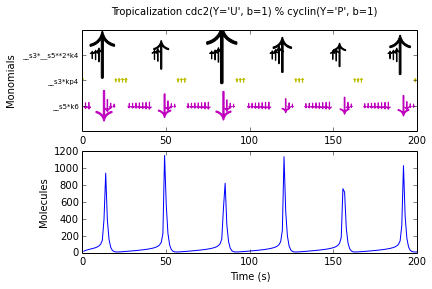

[0, 1, 4]

In [4]:
tspan_tyson = np.linspace(0,200,200)
run_tropical(tyson_model,tspan_tyson, sp_visualize=[3,5])

This is the tropicalization of the driver species in the Tyson cycle, which correspond to species 3 and 5. In the figures the direction of the arrow represents whether the concentration of the species is increasing or decreasing. Thus, an up arraw means that that the monomial is main contributor to increase the species concetration at that specific time point, and the down arrow means that monomial is the main cause that the protein concentration is decreasing. Additionally, the size of the arrow indicates how strongly the monomials is affecting contributing to changes of the species concentration. As we can see from the results different monomials dominate over different time scales


# Tropical algebra analysis of EARM

The Extrinsic Apoptosis Reaction Model, is a family of models of the extrinsic apoptosis pathway written using the Python software framework PySB. Here we focus on the Lopez_embedded model, http://msb.embopress.org/content/msb/9/1/646.full.pdf, as this model describes new experimental findinds: Interactions among Bcl-2 family members occur at the mitochondrial membrane rather than in the cytosol (Lovell et al,2008) and anti-apoptotic proteins are able to bind both the pore-forming proteins, such as Bax and Bak, and a larger family of BH3-only Bcl-2 family members,thus serving as dominant-negative effectors (Billen et al, 2008; Leber et al, 2010). We used James' github branch.

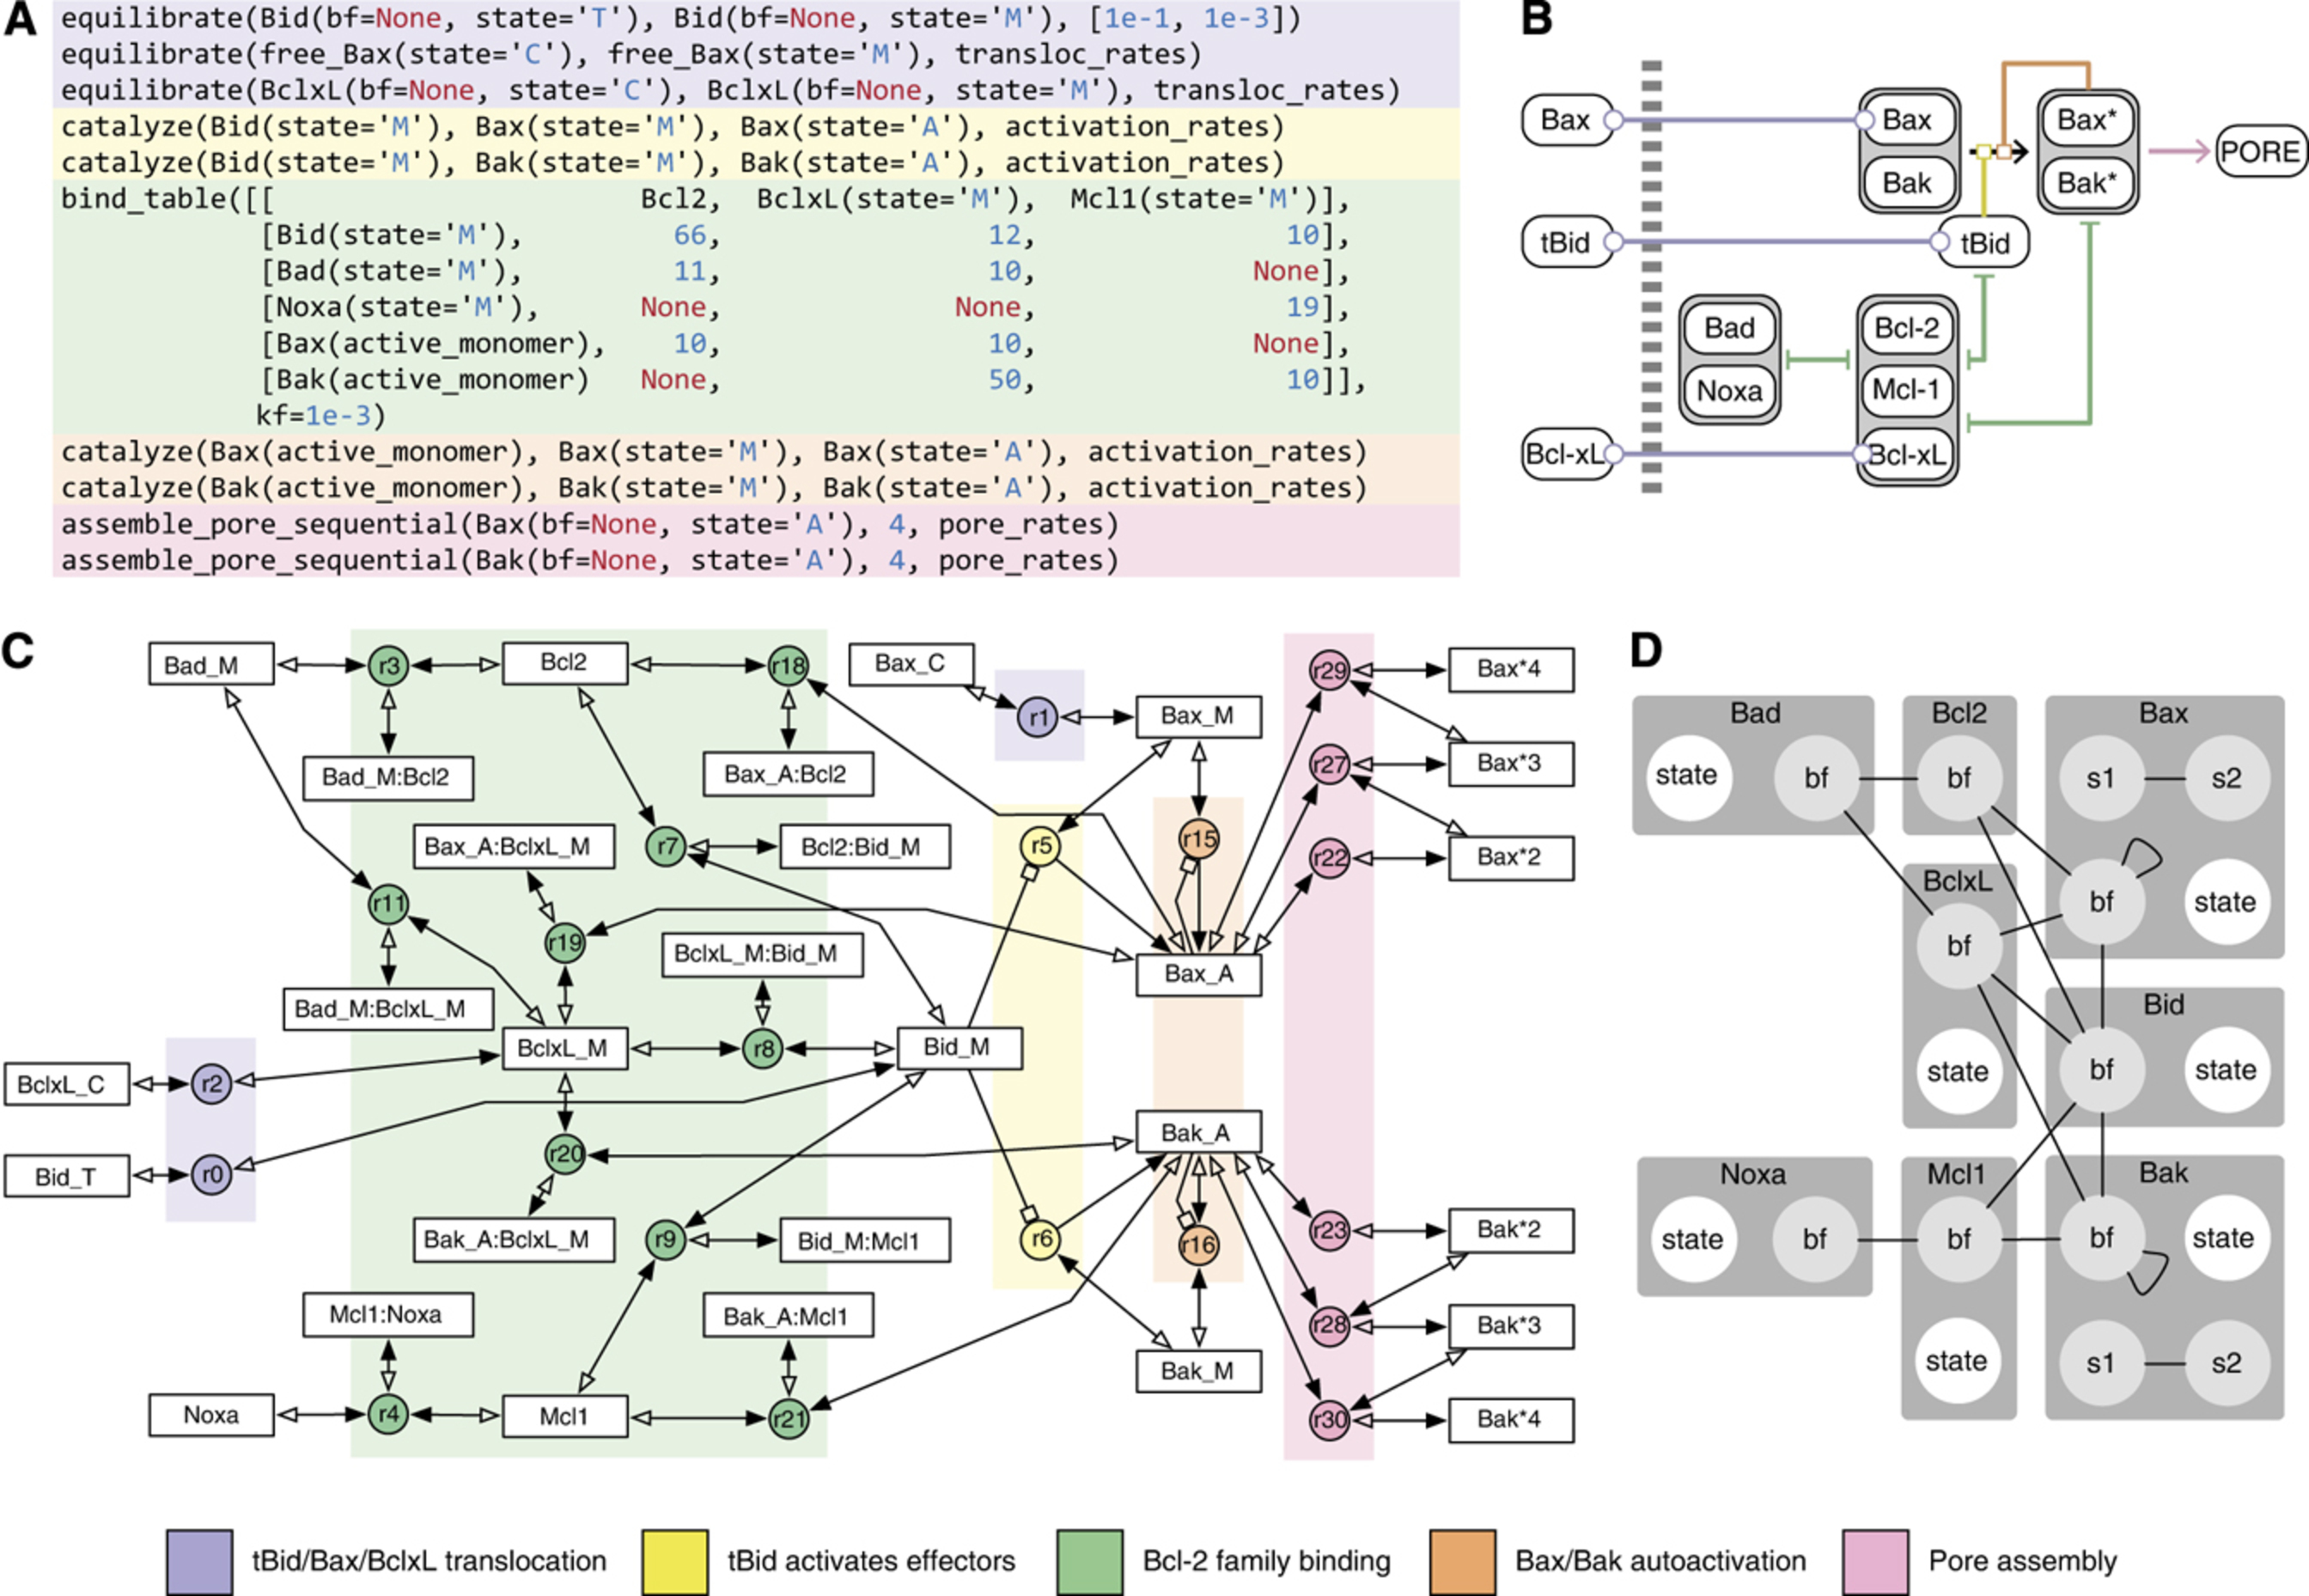

In [5]:
Image(filename='lopez_embedded.jpg', width=800)

Solving Simulation
Getting Passenger species
solution 0 from equation 5 is negative
solution 0 from equation 11 is negative
solution 0 from equation 19 is negative
solution 0 from equation 20 is negative
solution 0 from equation 29 is negative
solution 1 from equation 48 is negative
solution 1 from equation 54 is negative
solution 0 from equation 62 is negative
solution 0 from equation 63 is negative
solution 0 from equation 69 is negative
solution 0 from equation 70 is negative
solution 0 from equation 71 is negative
Computing conservation relations
Computing Conservation laws
Pruning Equations
equation to tropicalize
Getting tropicalized equations


/home/oscar/PycharmProjects/tropical/tropicalize.py:233: RuntimeWarning: invalid value encountered in log10
  hey_pruned = numpy.log10(f_m(*args1)) - numpy.log10(f_ble(*args2))


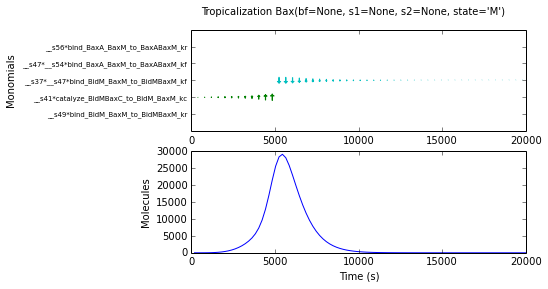

[0,
 1,
 14,
 15,
 16,
 17,
 18,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 31,
 32,
 34,
 35,
 36,
 37,
 41,
 42,
 43,
 44,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 54,
 56,
 57,
 58,
 60,
 64,
 67,
 68,
 74,
 75]

In [6]:
tspan_earm = np.linspace(0,20000,100)
run_tropical(earm_model,tspan_earm, sp_visualize=[47])

Here we show the tropicalization of species 47 that is Bax(bf=None, s1=None, s2=None, state='M') and we also get a list of the passenger species specific for this parameter set. Hence, the next step was to explore if for different parameter sets we would get the same set of passenger and driver species:

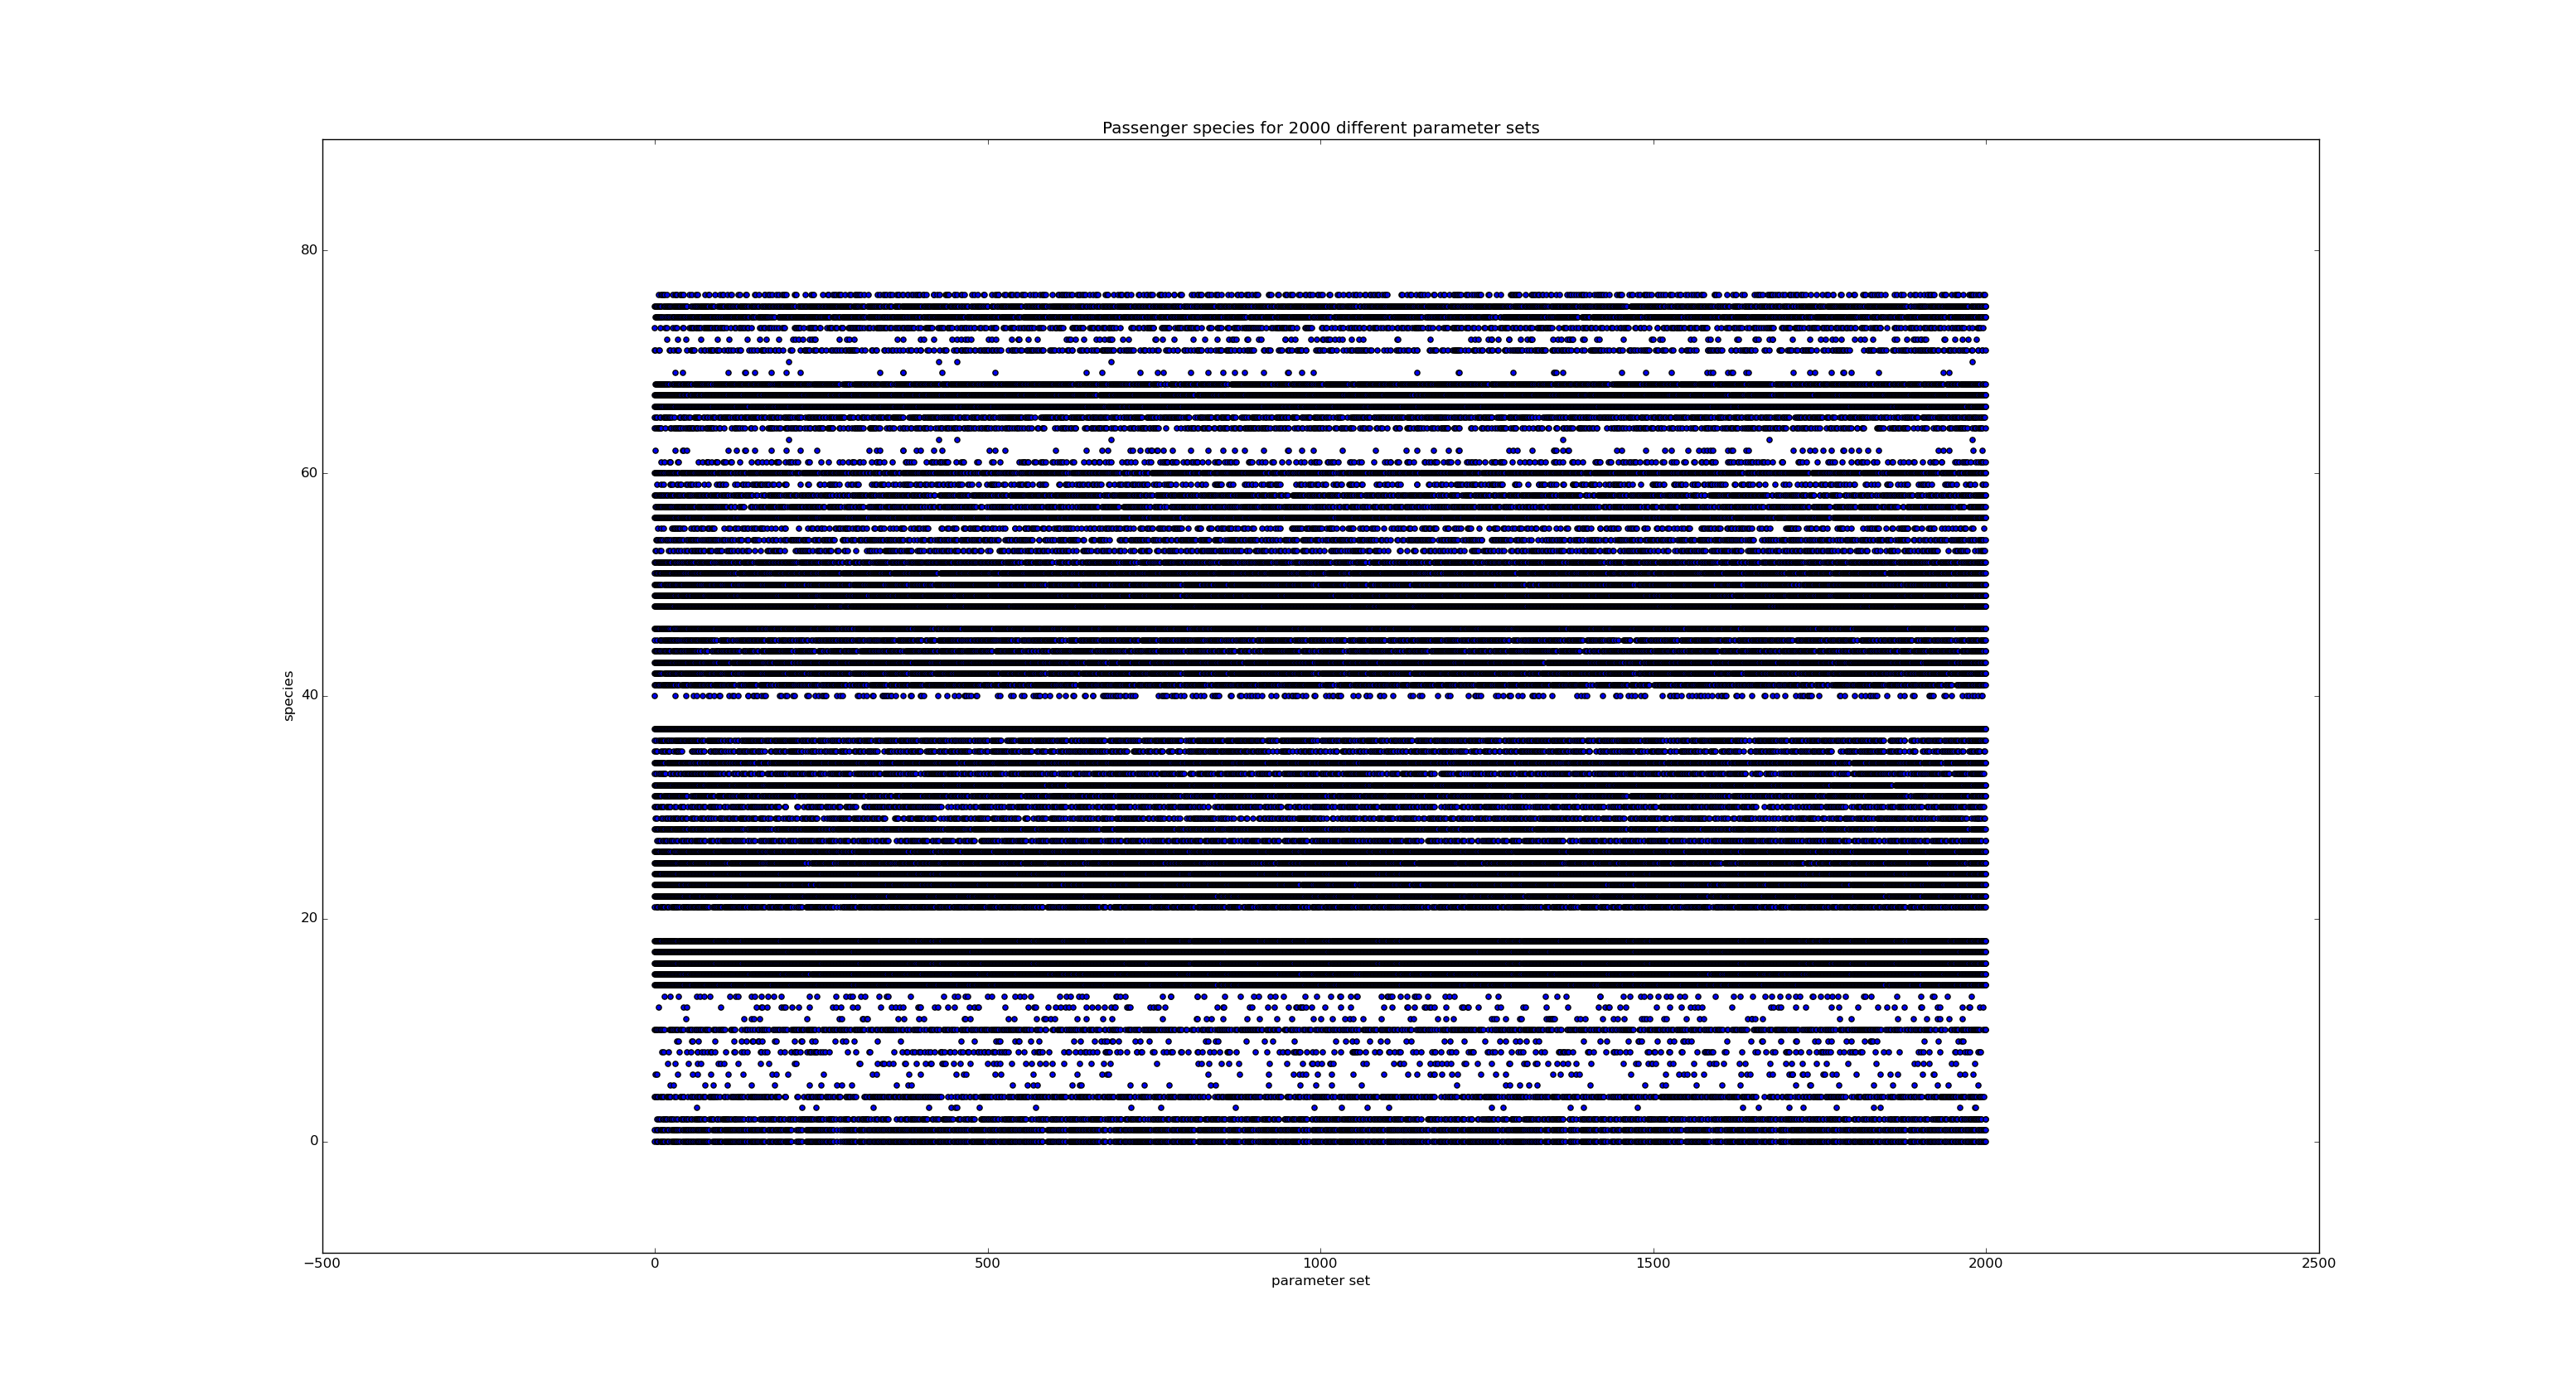

In [7]:
Image(filename='all_parameters_drivers.png', width=4000)

In this figure we have the parameter sets on the x axis and the model species on the y axis. For each parameter set we get the passenger species that are represented by dots in the figure. Therefore, the species that are blank over all the different parameter sets represent the species that are always drivers for the 2000 different parameter sets that we have. Here we found that the species 19, 20, 38, 39 and 47 which are Noxa(bf=None, state='M'), CytoC(bf=None, state='M'), C3(bf=None, state='ub'), PARP(bf=None, state='C'), Bax(bf=None, s1=None, s2=None, state='M') respectively, are always drivers. Thus, we focus on this species to see if their tropical signatures from different parameter sets cluster in different groups where different monomials dominate over different time scales.

Using Optimal Matching metrics and the package Traminer we did hierarchical clustering using the Ward's method

## sp19:  Noxa(bf=None, state='M')

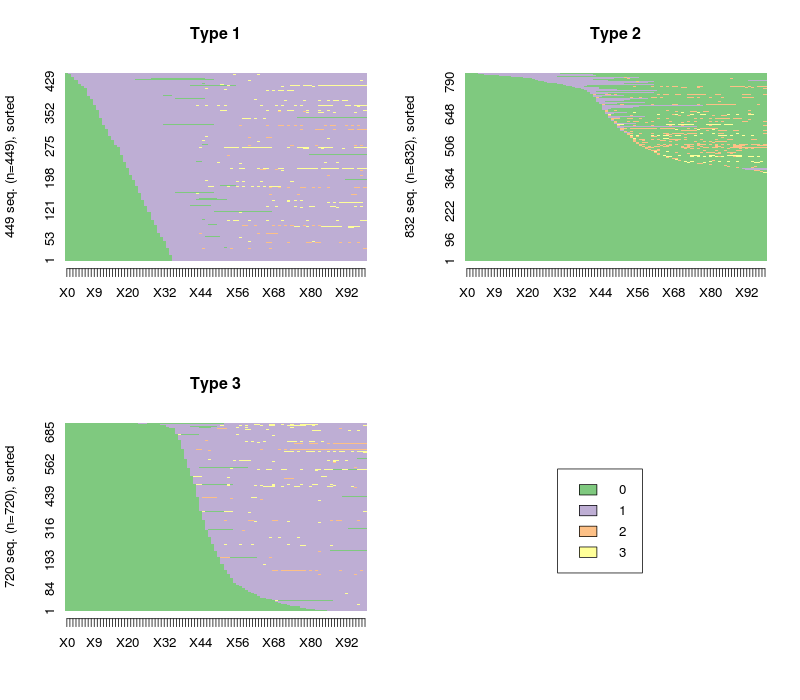

In [8]:
Image(filename='sp19_clusters.png', width=4000)

## sp20: CytoC(bf=None, state='M')

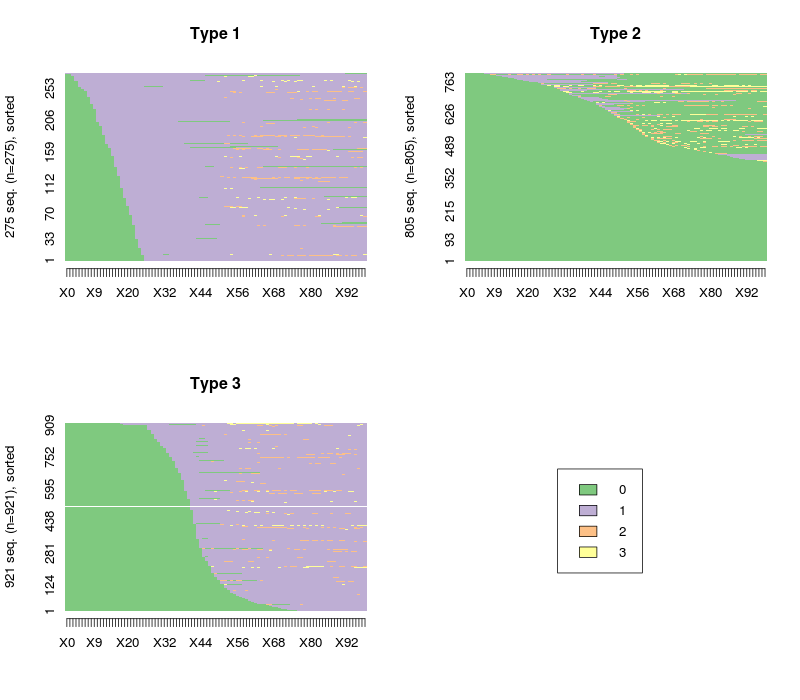

In [9]:
Image(filename='sp20_clusters.png', width=4000)

### species 38 and 39 don't cluster because they ony have one monomial in their differential equations.

## sp47: Bax(bf=None, s1=None, s2=None, state='M')

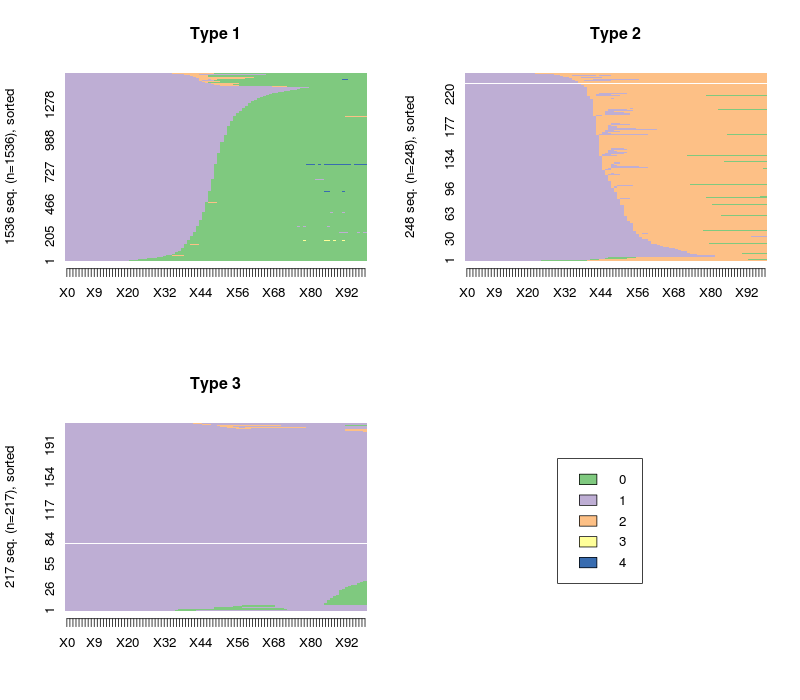

In [10]:
Image(filename='sp47_clusters.png', width=4000)

We can see that the tropical signatures cluster in three groups (we need to do more validations here) implying that there are different dynamics definede by different parameter sets. We can explore further and study and compare the distribution of parameter values of the clusters. Here we are going to work with species 47

Most of the parameter distributions of the clusters are very similar, here we present the parameter distributions that are the most dissimilar

## Par103: Parameter('assemble_pore_sequential_Bax_2_kr', 0.001)

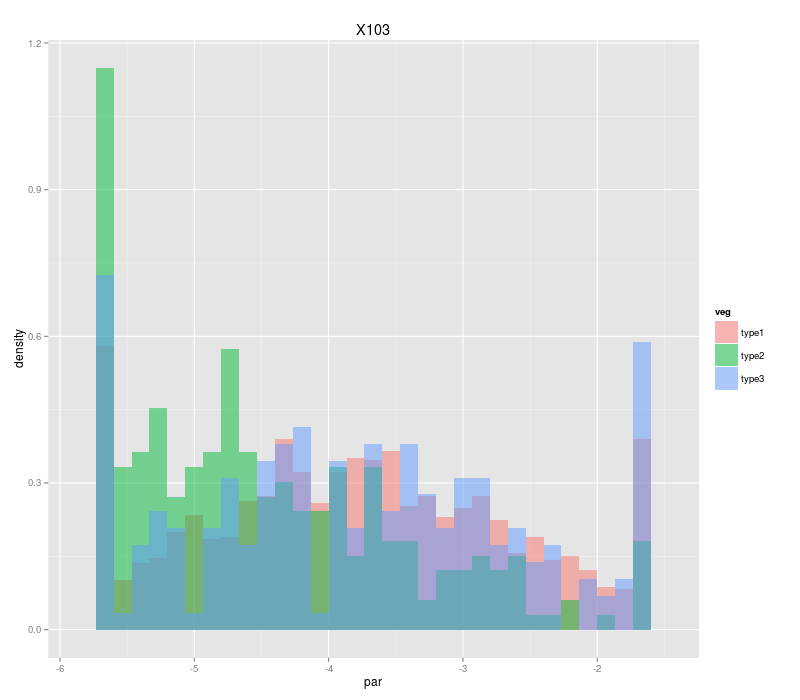

In [11]:
Image(filename='par103_hists.png', width=4000)

## Par77: Parameter('bind_BaxA_BaxM_to_BaxABaxM_kr', 0.001)

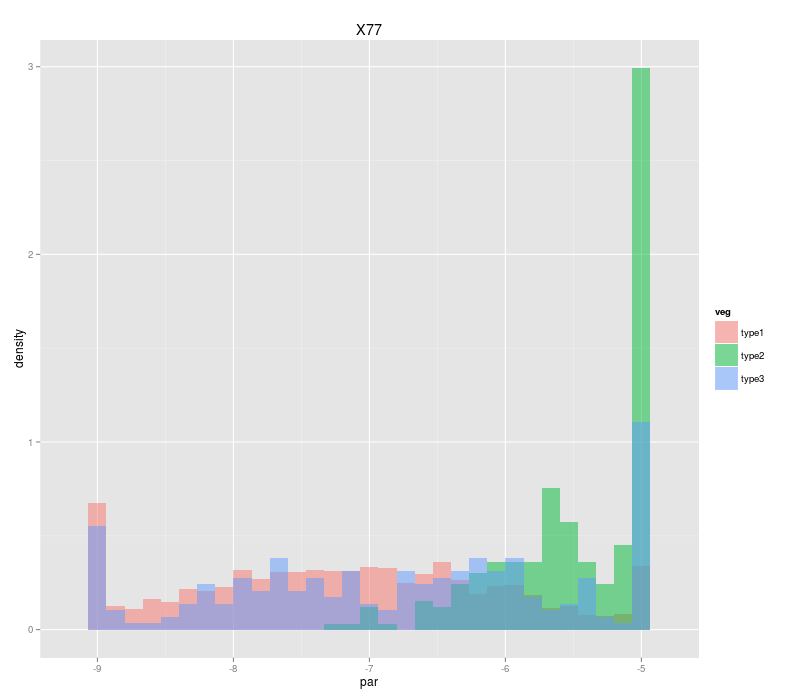

In [12]:
Image(filename='par77_hists.png', width=4000)

## Par71: Parameter('bind_BidM_BaxM_to_BidMBaxM_kr', 0.001)

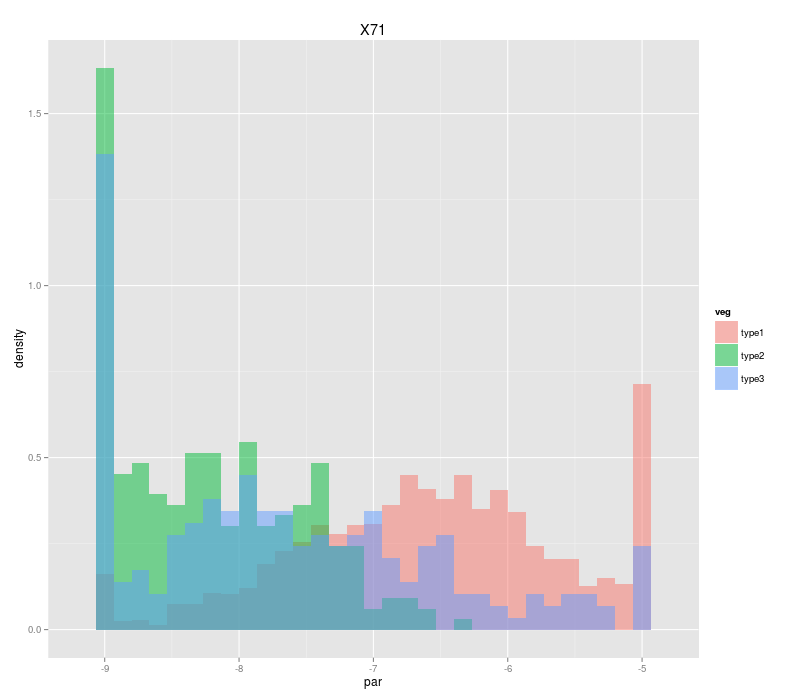

In [13]:
Image(filename='par71_hists.png', width=4000)

## Par68: Parameter('bind_BidM_BaxC_to_BidMBaxC_kr', 0.001)

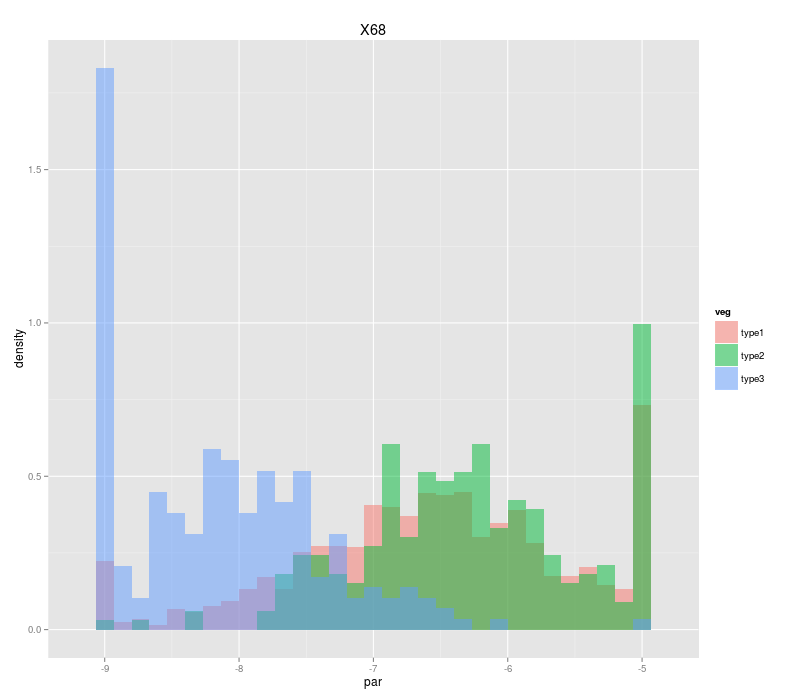

In [14]:
Image(filename='par68_hists.png', width=4000)

We can see that the parameters that have more dissimilar distributions are the parameters related to the species that we cluster

In [15]:
f1 = open('/home/oscar/Documents/tropical_project/parameters_2000/pars_embedded_524.txt') 
data1 = csv.reader(f1)
parames1 = []
for i in data1:parames1.append(float(i[1]))
    
f2 = open('/home/oscar/Documents/tropical_project/parameters_2000/pars_embedded_1317.txt') 
data2 = csv.reader(f2)
parames2 = []
for i in data2:parames2.append(float(i[1]))   
    
f3 = open('/home/oscar/Documents/tropical_project/parameters_2000/pars_embedded_1969.txt') 
data3 = csv.reader(f3)
parames3 = []
for i in data3:parames3.append(float(i[1]))

### Tropicalization of species 47 with parameter set from cluster  1

Solving Simulation
Getting Passenger species
solution 0 from equation 9 is negative
solution 0 from equation 19 is negative
solution 0 from equation 20 is negative
solution 0 from equation 35 is negative
solution 1 from equation 48 is negative
solution 1 from equation 54 is negative
solution 0 from equation 62 is negative
solution 0 from equation 63 is negative
solution 0 from equation 69 is negative
solution 0 from equation 70 is negative
Computing conservation relations
Computing Conservation laws
Pruning Equations
equation to tropicalize
Getting tropicalized equations


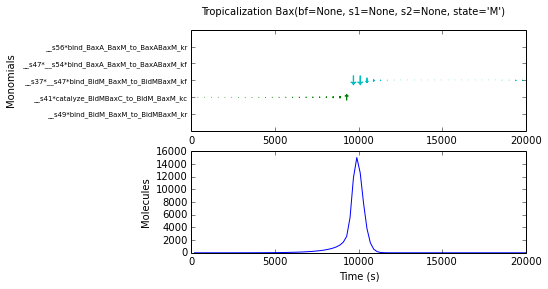

[14,
 15,
 16,
 17,
 18,
 22,
 24,
 26,
 28,
 29,
 31,
 32,
 33,
 34,
 36,
 37,
 40,
 41,
 42,
 43,
 45,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 59,
 60,
 61,
 66,
 67,
 68,
 71,
 73,
 74,
 75,
 76]

In [16]:
run_tropical(earm_model,tspan_earm, parames1, sp_visualize=[47])

### Tropicalization of species 47 with parameter set from cluster  2

Solving Simulation
Getting Passenger species
solution 0 from equation 5 is negative
solution 0 from equation 11 is negative
solution 0 from equation 19 is negative
solution 0 from equation 20 is negative
solution 0 from equation 29 is negative
solution 1 from equation 48 is negative
solution 0 from equation 54 is negative
solution 1 from equation 54 is negative
solution 0 from equation 62 is negative
solution 0 from equation 63 is negative
solution 0 from equation 64 is negative
solution 0 from equation 69 is negative
solution 0 from equation 70 is negative
solution 0 from equation 71 is negative
Computing conservation relations
Computing Conservation laws
Pruning Equations
equation to tropicalize
Getting tropicalized equations


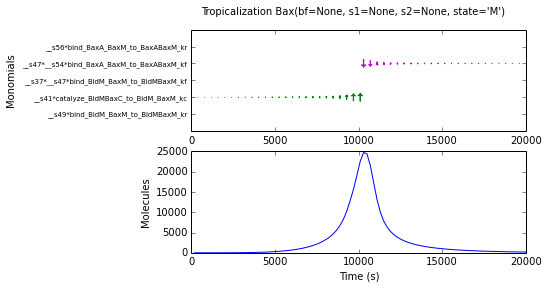

[2,
 10,
 13,
 14,
 15,
 16,
 17,
 22,
 23,
 25,
 26,
 27,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 41,
 42,
 43,
 44,
 46,
 48,
 49,
 50,
 51,
 52,
 53,
 55,
 56,
 58,
 60,
 61,
 65,
 66,
 67,
 68,
 72,
 74,
 75,
 76]

In [17]:
run_tropical(earm_model,tspan_earm, parames2, sp_visualize=[47])

### Tropicalization of species 47 with parameter set from cluster  3

Solving Simulation
Getting Passenger species
solution 0 from equation 5 is negative
solution 0 from equation 9 is negative
solution 0 from equation 19 is negative
solution 0 from equation 20 is negative
solution 0 from equation 35 is negative
solution 1 from equation 48 is negative
solution 1 from equation 54 is negative
solution 0 from equation 62 is negative
solution 0 from equation 63 is negative
solution 0 from equation 69 is negative
solution 0 from equation 70 is negative
solution 0 from equation 71 is negative
Computing conservation relations
Computing Conservation laws
Pruning Equations
equation to tropicalize
Getting tropicalized equations


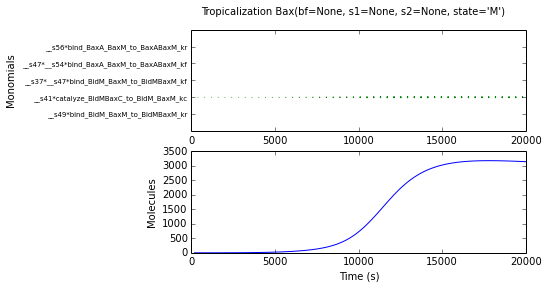

[0,
 1,
 14,
 15,
 16,
 17,
 18,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 31,
 32,
 34,
 36,
 37,
 41,
 42,
 43,
 46,
 48,
 49,
 50,
 51,
 54,
 56,
 57,
 65,
 66,
 67,
 68,
 75]

In [18]:
run_tropical(earm_model,tspan_earm, parames3, sp_visualize=[47])